In [29]:
import pandas as pd
import numpy as np

In [30]:
train = pd.read_csv("./train_data.csv")
test = pd.read_csv("./test_data.csv")

print(train.shape, test.shape)
train.head()

(19720, 17) (29582, 16)


,id,video_id,title,publishedAt,channelId,channelTitle,categoryId,collection_date,tags,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,y
0,1,GDtyztIThRQ,[12] BGM Inazuma Eleven 3 - ~ライオコツト ダンジョン~,2011-01-09T05:50:33.000Z,UCQaNYC3dNvH8FqrEyK7hTJw,DjangoShiny,20,20.01.02,Inazuma|Eleven|Super|Once|bgm|ost|イナズマイレブン|Kyo...,114,0,7,https://i.ytimg.com/vi/GDtyztIThRQ/default.jpg,False,False,~ライオコツト ダンジョン~Inazuma Eleven 3 BGM Complete (R...,29229
1,2,m4H9s3GtTlQ,ねごと - メルシールー [Official Music Video],2012-07-23T03:00:09.000Z,UChMWDi-HBm5aS3jyRSaAWUA,ねごと Official Channel,10,20.08.02,ねごと|ネゴト|メルシールー|Re:myend|リマインド|Lightdentity|ライデ...,2885,50,111,https://i.ytimg.com/vi/m4H9s3GtTlQ/default.jpg,False,False,http://www.negoto.com/全員平成生まれ、蒼山幸子（Vo＆Key)、沙田瑞...,730280
2,3,z19zYZuLuEU,VF3tb 闇よだれvsちび太 (SEGA),2007-07-26T13:54:09.000Z,UCBdcyoZSt5HBLd_n6we-xIg,siropai,24,20.14.01,VF3|VF4|VF5|ちび太|闇よだれ|chibita|virtuafighter|seg...,133,17,14,https://i.ytimg.com/vi/z19zYZuLuEU/default.jpg,False,False,Beat-tribe cup finalhttp://ameblo.jp/siropai/,80667
3,4,pmcIOsL7s98,free frosty weekend!,2005-05-15T02:38:43.000Z,UC7K5am1UAQEsCRhzXpi9i1g,Jones4Carrie,22,19.22.12,frosty,287,51,173,https://i.ytimg.com/vi/pmcIOsL7s98/default.jpg,False,False,I look so bad but look at me!,34826
4,5,ZuQgsTcuM-4,トップ・オブ・ザ・ワールド,2007-09-09T09:52:47.000Z,UCTW1um4R-QWa8iIfITGvlZQ,Tatsuya Maruyama,10,20.08.01,ギター|guitar|南澤大介|トップオブザワールド|トップ|オブ|ワールド|カーペンターズ...,178,6,17,https://i.ytimg.com/vi/ZuQgsTcuM-4/default.jpg,False,False,ソロギターのしらべより「トップオブザワールド」です。クラシックギターで弾いてます。Offic...,172727


In [31]:
# trainとtestをくっつけることで前処理を楽にする（同じ動作を繰り返す必要がなくなる）
target = train["y"]
del train["y"]
df = pd.concat([train, test])
print(df.shape)  # 19720 + 29582 = 49302
df.head()

(49302, 16)


,id,video_id,title,publishedAt,channelId,channelTitle,categoryId,collection_date,tags,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,1,GDtyztIThRQ,[12] BGM Inazuma Eleven 3 - ~ライオコツト ダンジョン~,2011-01-09T05:50:33.000Z,UCQaNYC3dNvH8FqrEyK7hTJw,DjangoShiny,20,20.01.02,Inazuma|Eleven|Super|Once|bgm|ost|イナズマイレブン|Kyo...,114,0,7,https://i.ytimg.com/vi/GDtyztIThRQ/default.jpg,False,False,~ライオコツト ダンジョン~Inazuma Eleven 3 BGM Complete (R...
1,2,m4H9s3GtTlQ,ねごと - メルシールー [Official Music Video],2012-07-23T03:00:09.000Z,UChMWDi-HBm5aS3jyRSaAWUA,ねごと Official Channel,10,20.08.02,ねごと|ネゴト|メルシールー|Re:myend|リマインド|Lightdentity|ライデ...,2885,50,111,https://i.ytimg.com/vi/m4H9s3GtTlQ/default.jpg,False,False,http://www.negoto.com/全員平成生まれ、蒼山幸子（Vo＆Key)、沙田瑞...
2,3,z19zYZuLuEU,VF3tb 闇よだれvsちび太 (SEGA),2007-07-26T13:54:09.000Z,UCBdcyoZSt5HBLd_n6we-xIg,siropai,24,20.14.01,VF3|VF4|VF5|ちび太|闇よだれ|chibita|virtuafighter|seg...,133,17,14,https://i.ytimg.com/vi/z19zYZuLuEU/default.jpg,False,False,Beat-tribe cup finalhttp://ameblo.jp/siropai/
3,4,pmcIOsL7s98,free frosty weekend!,2005-05-15T02:38:43.000Z,UC7K5am1UAQEsCRhzXpi9i1g,Jones4Carrie,22,19.22.12,frosty,287,51,173,https://i.ytimg.com/vi/pmcIOsL7s98/default.jpg,False,False,I look so bad but look at me!
4,5,ZuQgsTcuM-4,トップ・オブ・ザ・ワールド,2007-09-09T09:52:47.000Z,UCTW1um4R-QWa8iIfITGvlZQ,Tatsuya Maruyama,10,20.08.01,ギター|guitar|南澤大介|トップオブザワールド|トップ|オブ|ワールド|カーペンターズ...,178,6,17,https://i.ytimg.com/vi/ZuQgsTcuM-4/default.jpg,False,False,ソロギターのしらべより「トップオブザワールド」です。クラシックギターで弾いてます。Offic...


In [32]:
df["publishedAt"] = pd.to_datetime(df["publishedAt"])
df["publishedAt_year"] = df["publishedAt"].apply(lambda x: x.year)
df["publishedAt_month"] = df["publishedAt"].apply(lambda x: x.month)
df["publishedAt_day"] = df["publishedAt"].apply(lambda x: x.day)
df["length_tags"] = df["tags"].astype(str).apply(lambda x: len(x.split("|")))

In [33]:
df.head()

,id,video_id,title,publishedAt,channelId,channelTitle,categoryId,collection_date,tags,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,publishedAt_year,publishedAt_month,publishedAt_day,length_tags
0,1,GDtyztIThRQ,[12] BGM Inazuma Eleven 3 - ~ライオコツト ダンジョン~,2011-01-09 05:50:33+00:00,UCQaNYC3dNvH8FqrEyK7hTJw,DjangoShiny,20,20.01.02,Inazuma|Eleven|Super|Once|bgm|ost|イナズマイレブン|Kyo...,114,0,7,https://i.ytimg.com/vi/GDtyztIThRQ/default.jpg,False,False,~ライオコツト ダンジョン~Inazuma Eleven 3 BGM Complete (R...,2011,1,9,48
1,2,m4H9s3GtTlQ,ねごと - メルシールー [Official Music Video],2012-07-23 03:00:09+00:00,UChMWDi-HBm5aS3jyRSaAWUA,ねごと Official Channel,10,20.08.02,ねごと|ネゴト|メルシールー|Re:myend|リマインド|Lightdentity|ライデ...,2885,50,111,https://i.ytimg.com/vi/m4H9s3GtTlQ/default.jpg,False,False,http://www.negoto.com/全員平成生まれ、蒼山幸子（Vo＆Key)、沙田瑞...,2012,7,23,19
2,3,z19zYZuLuEU,VF3tb 闇よだれvsちび太 (SEGA),2007-07-26 13:54:09+00:00,UCBdcyoZSt5HBLd_n6we-xIg,siropai,24,20.14.01,VF3|VF4|VF5|ちび太|闇よだれ|chibita|virtuafighter|seg...,133,17,14,https://i.ytimg.com/vi/z19zYZuLuEU/default.jpg,False,False,Beat-tribe cup finalhttp://ameblo.jp/siropai/,2007,7,26,9
3,4,pmcIOsL7s98,free frosty weekend!,2005-05-15 02:38:43+00:00,UC7K5am1UAQEsCRhzXpi9i1g,Jones4Carrie,22,19.22.12,frosty,287,51,173,https://i.ytimg.com/vi/pmcIOsL7s98/default.jpg,False,False,I look so bad but look at me!,2005,5,15,1
4,5,ZuQgsTcuM-4,トップ・オブ・ザ・ワールド,2007-09-09 09:52:47+00:00,UCTW1um4R-QWa8iIfITGvlZQ,Tatsuya Maruyama,10,20.08.01,ギター|guitar|南澤大介|トップオブザワールド|トップ|オブ|ワールド|カーペンターズ...,178,6,17,https://i.ytimg.com/vi/ZuQgsTcuM-4/default.jpg,False,False,ソロギターのしらべより「トップオブザワールド」です。クラシックギターで弾いてます。Offic...,2007,9,9,12


In [34]:
data = data.drop(["channelId",
                  "video_id",
                  "publishedAt", 
                  "thumbnail_link", 
                  "channelTitle",
                  "collection_date",
                  "id",
                  "tags",
                  "description",
                  "title"], axis=1)

In [35]:
data.head()

,categoryId,likes,dislikes,comment_count,comments_disabled,ratings_disabled
0,20,114,0,7,False,False
1,10,2885,50,111,False,False
2,24,133,17,14,False,False
3,22,287,51,173,False,False
4,10,178,6,17,False,False


In [36]:
import gc
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_log_error
import lightgbm as lgb

In [37]:
train = data.iloc[:len(target), :]
test = data.iloc[len(target):, :]

train.shape, test.shape

((19720, 6), (29582, 6))

In [50]:
# Kfold
cv = KFold(n_splits=5, shuffle=True, random_state=2021)
# RMSLE用
score = 0
# testデータの予測用
pred = np.zeros(test.shape[0])

In [51]:
target = np.log(target)

In [52]:
target.shape

(19720,)

In [53]:
params = {
    'boosting_type': 'gbdt',
    'metric': 'rmse',
    'objective': 'regression',
    'seed': 20,
    'learning_rate': 0.01,
    "n_jobs": -1,
    "verbose": -1
}

In [54]:
for tr_idx, val_idx in cv.split(train):
    x_train, x_val = train.iloc[tr_idx], train.iloc[val_idx]
    y_train, y_val = target[tr_idx], target[val_idx]
    
    # Datasetに入れて学習させる
    train_set = lgb.Dataset(x_train, y_train)
    val_set = lgb.Dataset(x_val, y_val, reference=train_set)
        
    # Training
    model = lgb.train(params, train_set, num_boost_round=8000, early_stopping_rounds=100,
                      valid_sets=[train_set, val_set], verbose_eval=500)
    
    # 予測したらexpで元に戻す
    test_pred = np.exp(model.predict(test))
    # 0より小さな値があるとエラーになるので補正
    test_pred = np.where(test_pred < 0, 0, test_pred)
    pred += test_pred / 5  #  5fold回すので

    oof = np.exp(model.predict(x_val))
    oof = np.where(oof < 0, 0, oof)
    rmsle = np.sqrt(mean_squared_log_error(np.exp(y_val), oof))
    print(f"RMSLE : {rmsle}")
    score += model.best_score["valid_1"]["rmse"] / 5

Training until validation scores don't improve for 100 rounds
[500]	training's rmse: 0.0884299	valid_1's rmse: 0.0974864
Early stopping, best iteration is:
[665]	training's rmse: 0.0873594	valid_1's rmse: 0.0973615
RMSLE : 0.08607772677641823
Training until validation scores don't improve for 100 rounds
[500]	training's rmse: 0.0894594	valid_1's rmse: 0.0928214
Early stopping, best iteration is:
[820]	training's rmse: 0.0876558	valid_1's rmse: 0.0926757
RMSLE : 0.08355101927080008
Training until validation scores don't improve for 100 rounds
[500]	training's rmse: 0.0891573	valid_1's rmse: 0.0944382
Early stopping, best iteration is:
[797]	training's rmse: 0.087379	valid_1's rmse: 0.0940395
RMSLE : 0.08298218626896782
Training until validation scores don't improve for 100 rounds
[500]	training's rmse: 0.0893683	valid_1's rmse: 0.0942141
Early stopping, best iteration is:
[851]	training's rmse: 0.0876733	valid_1's rmse: 0.0938175
RMSLE : 0.0826410265042546
Training until validation scor

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

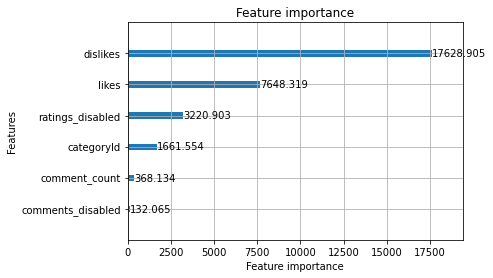

In [55]:
lgb.plot_importance(model, importance_type="gain", max_num_features=20)

In [56]:
print(f"Mean RMSLE SCORE :{score}")

Mean RMSLE SCORE :0.09323873142101219


In [57]:
submit_df = pd.DataFrame({"y": pred})
submit_df.index.name = "id"
submit_df.to_csv("submit.csv")

In [58]:
submit_df = pd.DataFrame({"y": pred})
submit_df.index.name = "id"
submit_df.to_csv("submit.csv")